In [43]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import pandas_datareader as web

In [44]:
tickers = ["AAPL"]
ohlcv_data = {}

    Web Scraping: Yahoo
    

In [45]:
#Iteration para cada ticker en tickers
for ticker in tickers:
    temp = yf.download(tickers, period = "1y", interval ='1d')
    temp.dropna(how = 'any', inplace =  True)
    ohlcv_data[ticker] = temp


[*********************100%%**********************]  1 of 1 completed


    Creando columnas de datos 

In [48]:
temp['return'] = temp['Adj Close'].pct_change()
temp['H-PC'] = temp['High'] - temp['Low']
 

    Data Visualization

In [49]:
temp.head()

,Open,High,Low,Close,Adj Close,Volume,return,H-PC
Date,,,,,,,,
2022-10-07,142.539993,143.100006,139.449997,140.089996,139.263824,85925600,NaN,3.650009
2022-10-10,140.419998,141.889999,138.570007,140.419998,139.591888,74899000,0.002356,3.319992
2022-10-11,139.899994,141.350006,138.220001,138.979996,138.160370,77033700,-0.010255,3.130005
2022-10-12,139.130005,140.360001,138.160004,138.339996,137.524139,70433700,-0.004605,2.199997
2022-10-13,134.990005,143.589996,134.369995,142.990005,142.146744,113224000,0.033613,9.220001


<Axes: title={'center': 'Graph1'}, xlabel='Date', ylabel='return'>

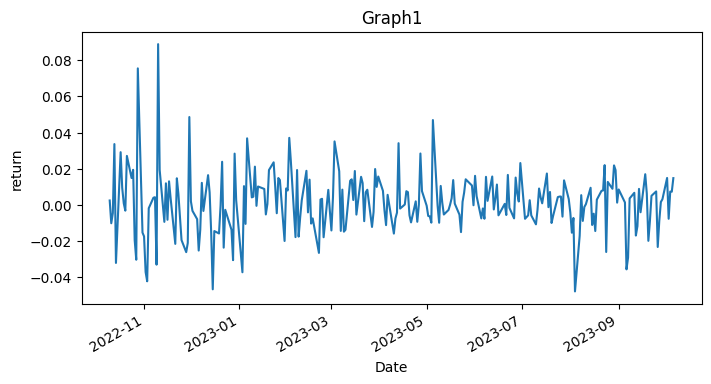

In [50]:
temp['return'].plot(kind = 
                    'line', xlabel = 'Date', ylabel = 'return',
                      title = 'Graph1', figsize =(8,4))

    VaR: Value at Risk

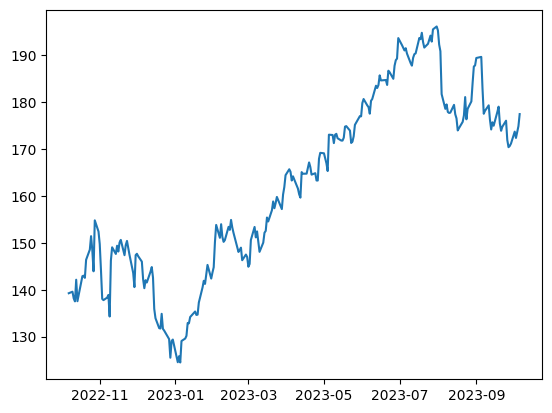

In [51]:

appl_cierre = temp['Adj Close']
plt.plot(appl_cierre)

In [52]:
#CALCULO DE LOS RETORNOS DE LA SERIE (LOGARITMOS Y DIFERENCIACION)
appl_retornos = np.log(appl_cierre) - np.log(appl_cierre.shift(1))
appl_ret = appl_retornos.dropna()
appl_ret.head()

Date
2022-10-10    0.002353
2022-10-11   -0.010308
2022-10-12   -0.004616
2022-10-13    0.033060
2022-10-14   -0.032771
Name: Adj Close, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

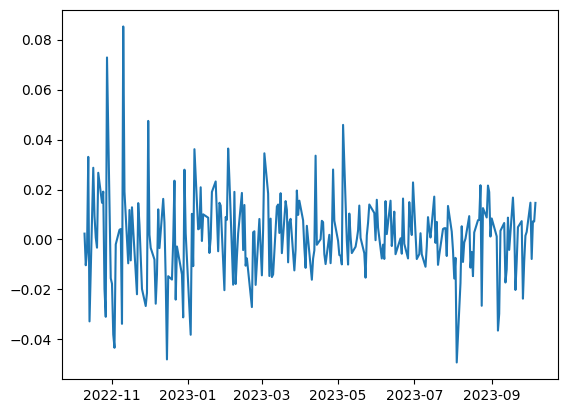

In [53]:
#GRAFICAR RETORNOS DE APPL
plt.plot(appl_ret)
plt.show

In [54]:
#CALCULANDO "VaR" para una inversión de 1,000,000 USD
inv_inicial = 1000000

#Intervalo de confianza: 95%
percent = 5
var_95 = np.percentile(appl_ret, percent)
print(var_95)

print(var_95*inv_inicial)

-0.026571915691948833
-26571.915691948834


    TE: Tracking Error

In [55]:
data = yf.download(['AAPL', '^GSPC'], start='2020-01-01', end='2020-12-31')['Adj Close']
data.head()

[*********************100%%**********************]  2 of 2 completed


,AAPL,^GSPC
Date,,
2020-01-02,73.249016,3257.850098
2020-01-03,72.536888,3234.850098
2020-01-06,73.114906,3246.280029
2020-01-07,72.771042,3237.179932
2020-01-08,73.941635,3253.050049


In [56]:
#Tracking error = Standard deviation (stock return - benchmark return)
data['stock_return'] = data['AAPL'].pct_change()
data['bench_return'] = data['^GSPC'].pct_change()
data

,AAPL,^GSPC,stock_return,bench_return
Date,,,,
2020-01-02,73.249016,3257.850098,NaN,NaN
2020-01-03,72.536888,3234.850098,-0.009722,-0.007060
2020-01-06,73.114906,3246.280029,0.007969,0.003533
2020-01-07,72.771042,3237.179932,-0.004703,-0.002803
2020-01-08,73.941635,3253.050049,0.016086,0.004902
...,...,...,...,...
2020-12-23,128.856796,3690.010010,-0.006976,0.000746
2020-12-24,129.850571,3703.060059,0.007712,0.003537
2020-12-28,134.494797,3735.360107,0.035766,0.008723


In [57]:
data['TE'] = data['stock_return'] - data['bench_return']
data.head()

,AAPL,^GSPC,stock_return,bench_return,TE
Date,,,,,
2020-01-02,73.249016,3257.850098,NaN,NaN,NaN
2020-01-03,72.536888,3234.850098,-0.009722,-0.007060,-0.002662
2020-01-06,73.114906,3246.280029,0.007969,0.003533,0.004435
2020-01-07,72.771042,3237.179932,-0.004703,-0.002803,-0.001900
2020-01-08,73.941635,3253.050049,0.016086,0.004902,0.011184


In [58]:
te = data['TE'].std()*100

In [59]:
te*np.sqrt(252)

26.453589128754192

Exportando archivo a Excell

In [60]:
excel_file = r'C:/Users/IVAN/Documents/VSCODE/Python/Python Basics/archivo.xlsx'
temp.to_excel(excel_file, index = False, sheet_name='Datos')
print(f'Archivo {excel_file} generado exitosamente.')

Archivo C:/Users/IVAN/Documents/VSCODE/Python/Python Basics/archivo.xlsx generado exitosamente.
